In [1]:
import yt
from yt import derived_field

import trident

import numpy as np 

from astropy.table import Table
import astropy.units as u

import os
os.sys.path.insert(0, '/Users/molly/Dropbox/foggie/foggie')

from consistency import *
from get_halo_center import get_halo_center
from get_proper_box_size import get_proper_box_size
from modular_plots import get_refine_box

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'
import matplotlib.pyplot as plt


/Users/molly/anaconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/molly/Dropbox/foggie/foggie/consistency.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use()

In [2]:
%matplotlib inline

In [3]:
# ds = yt.load("RD0020/RD0020")
ds = yt.load("/Users/molly/foggie/halo_008508/nref11c_nref9f/RD0022/RD0022")
# ds = yt.load("/astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/natural/RD0013/RD0013")
# trident.add_ion_fields(ds, ions=['C IV', 'O VI', 'H I', 'Si II', 'C II', 'Si III'])


yt : [INFO     ] 2019-04-23 16:16:57,914 Parameters: current_time              = 201.40058380198
yt : [INFO     ] 2019-04-23 16:16:57,915 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-04-23 16:16:57,916 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-04-23 16:16:57,917 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-04-23 16:16:57,917 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-04-23 16:16:57,918 Parameters: current_redshift          = 1.4999999269442
yt : [INFO     ] 2019-04-23 16:16:57,919 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2019-04-23 16:16:57,919 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2019-04-23 16:16:57,920 Parameters: hubble_constant           = 0.695


In [4]:
#track_name = "halo_track"
track_name = "halo_tracks/008508/nref11n_selfshield_15/halo_track_200kpc_nref9"
track = Table.read(track_name, format='ascii')
track.sort('col1')
zsnap = ds.get_parameter('CosmologyCurrentRedshift')
proper_box_size = get_proper_box_size(ds)

refine_box, refine_box_center, refine_width_code = get_refine_box(ds, zsnap, track)
refine_width = refine_width_code * proper_box_size

# center is trying to be the center of the halo
center, velocity = get_halo_center(ds, refine_box_center)



Parsing Hierarchy :  37%|███▋      | 3159/8445 [00:00<00:00, 31586.57it/s]

inside get_refine_box 1.4999999269442
using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
1.50073080303 0.492371 0.485352 0.502181 0.494371 0.487352 0.504181    9
get_halo_centers:  code_length code_velocity


Parsing Hierarchy : 100%|██████████| 8445/8445 [00:00<00:00, 24073.27it/s]
yt : [INFO     ] 2019-04-23 16:17:25,182 Gathering a field list (this may take a moment.)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/units/yt_array.py:978: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ret = super(YTArray, self).__getitem__(item)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/fields/fluid_fields.py:201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_field[slice_3d] = f


Located the main halo at: [0.49335384368896484, 0.4863595962524414, 0.5031938552856445] [-0.0004289939686120639 code_velocity, -0.002650478363333632 code_velocity, 0.0005623053577185513 code_velocity]


In [48]:
density_proj_min = 4e-2  # msun / pc^2
density_proj_max = 2e3


yt : [INFO     ] 2019-03-06 09:42:37,392 Projection completed
yt : [INFO     ] 2019-03-06 09:42:37,393 xlim = 0.501234 0.503154
yt : [INFO     ] 2019-03-06 09:42:37,393 ylim = 0.493075 0.494995
yt : [INFO     ] 2019-03-06 09:42:37,394 xlim = 0.501234 0.503154
yt : [INFO     ] 2019-03-06 09:42:37,395 ylim = 0.493075 0.494995
yt : [INFO     ] 2019-03-06 09:42:37,396 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



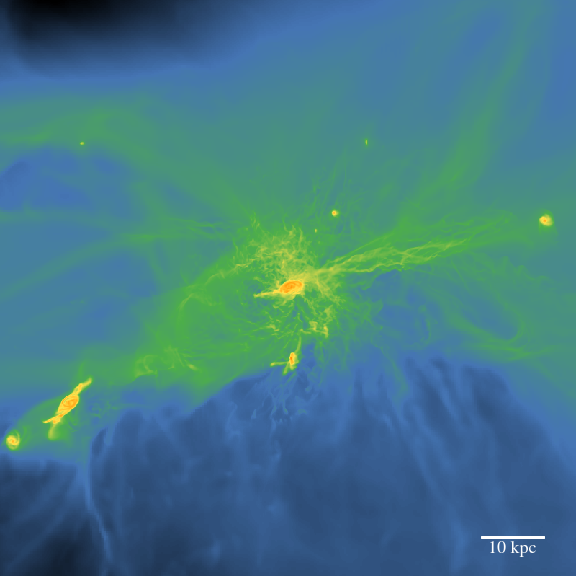

In [67]:
p = yt.ProjectionPlot(ds, 'y', ('gas','density'), center=refine_box_center, data_source=refine_box, width=(0.96*refine_width,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
#p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'white'})
p.show()

yt : [INFO     ] 2019-03-05 12:33:49,551 Projection completed
yt : [INFO     ] 2019-03-05 12:33:49,552 xlim = 0.501950 0.502150
yt : [INFO     ] 2019-03-05 12:33:49,552 ylim = 0.493795 0.493995
yt : [INFO     ] 2019-03-05 12:33:49,553 xlim = 0.501950 0.502150
yt : [INFO     ] 2019-03-05 12:33:49,554 ylim = 0.493795 0.493995
yt : [INFO     ] 2019-03-05 12:33:49,555 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



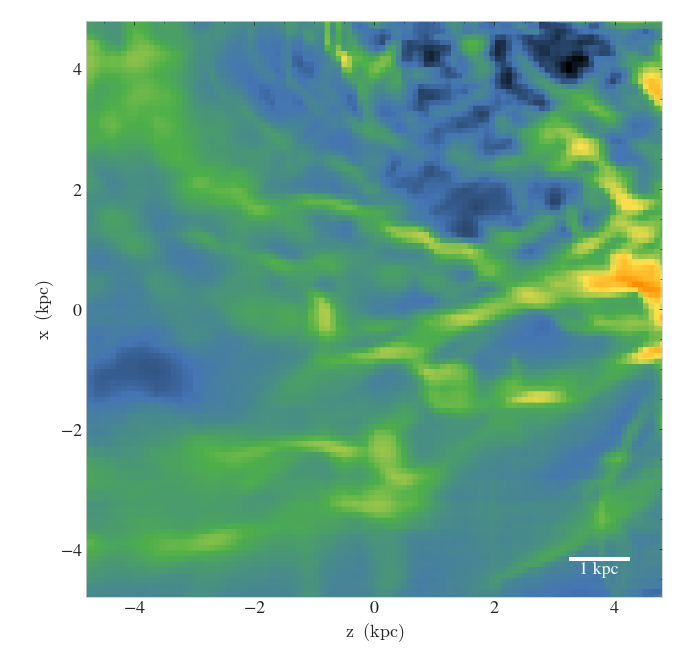

In [64]:
this_center = [center[0] - (7/proper_box_size), center[1], center[2]- (7/proper_box_size)]

p = yt.ProjectionPlot(ds, 'y', ('gas','density'), center=this_center, data_source=refine_box, width=(0.1*refine_width,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
#p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
p.hide_colorbar()
#p.hide_axes()
p.annotate_scale(size_bar_args={'color':'white'})
p.show()

yt : [INFO     ] 2019-03-05 12:34:28,912 Projection completed
yt : [INFO     ] 2019-03-05 12:34:28,913 xlim = 0.033069 0.971319
yt : [INFO     ] 2019-03-05 12:34:28,913 ylim = 0.024910 0.963160
yt : [INFO     ] 2019-03-05 12:34:28,914 xlim = 0.033069 0.971319
yt : [INFO     ] 2019-03-05 12:34:28,915 ylim = 0.024910 0.963160
yt : [INFO     ] 2019-03-05 12:34:28,916 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



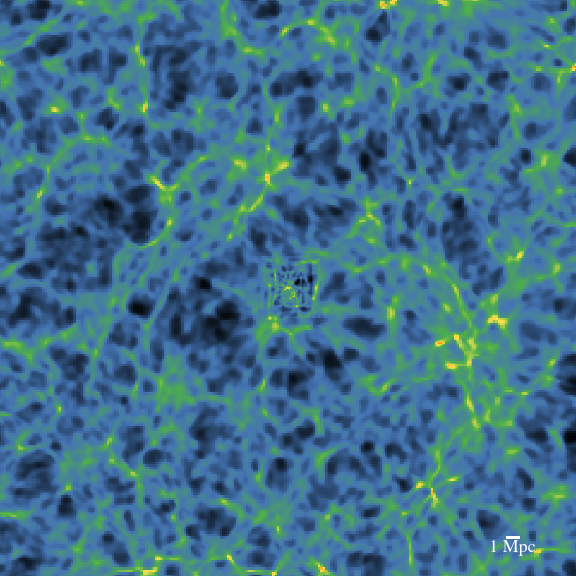

In [66]:
width = 45. * 1000. ## 100Mpc
width_code = width / proper_box_size ## needs to be in code units
box = ds.r[center[0] - 0.5*width_code : center[0] + 0.5*width_code, \
           center[1] - 0.5*5*refine_width_code : center[1] + 0.5*5*refine_width_code, \
           center[2] - 0.5*width_code : center[2] + 0.5*width_code]

p = yt.ProjectionPlot(ds, 'y', ('gas','density'), center=refine_box_center, data_source=box, width=(width,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
#p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'white'})
p.show()

yt : [INFO     ] 2019-03-05 12:33:41,253 Projection completed
yt : [INFO     ] 2019-03-05 12:33:41,254 xlim = 0.491769 0.512619
yt : [INFO     ] 2019-03-05 12:33:41,254 ylim = 0.483610 0.504460
yt : [INFO     ] 2019-03-05 12:33:41,255 xlim = 0.491769 0.512619
yt : [INFO     ] 2019-03-05 12:33:41,256 ylim = 0.483610 0.504460
yt : [INFO     ] 2019-03-05 12:33:41,257 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



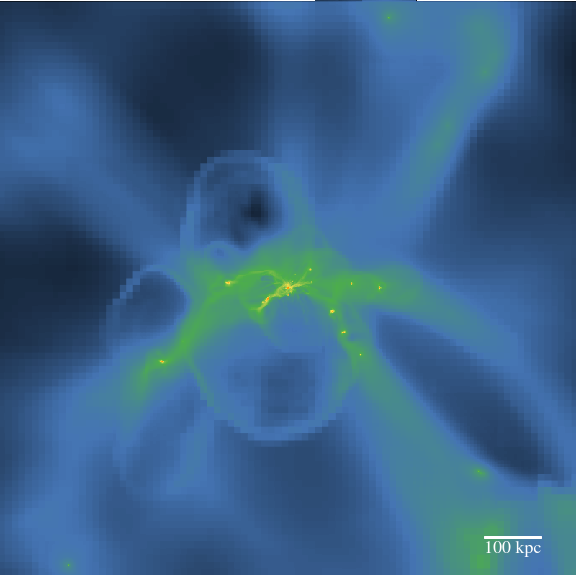

In [63]:
width = 1000. ## 1Mpc
width_code = width / proper_box_size ## needs to be in code units
box = ds.r[center[0] - 0.5*width_code : center[0] + 0.5*width_code, \
           center[1] - 0.5*2*refine_width_code : center[1] + 0.5*2*refine_width_code, \
           center[2] - 0.5*width_code : center[2] + 0.5*width_code]

p = yt.ProjectionPlot(ds, 'y', ('gas','density'), center=refine_box_center, data_source=box, width=(width,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
#p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'white'})
p.show()

yt : [INFO     ] 2019-03-04 10:34:20,541 xlim = 0.491092 0.493872
yt : [INFO     ] 2019-03-04 10:34:20,542 ylim = 0.481491 0.484271
yt : [INFO     ] 2019-03-04 10:34:20,543 xlim = 0.491092 0.493872
yt : [INFO     ] 2019-03-04 10:34:20,544 ylim = 0.481491 0.484271
yt : [INFO     ] 2019-03-04 10:34:20,545 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800



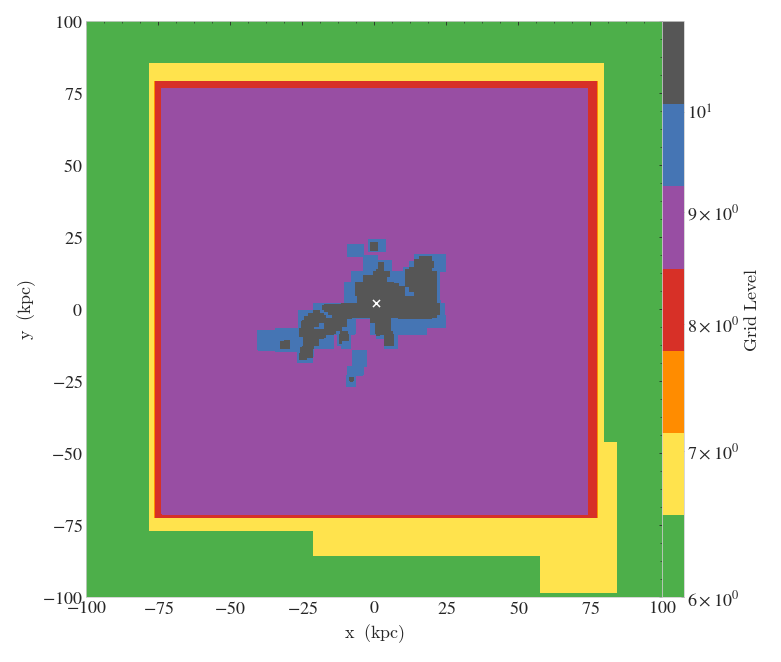

In [11]:
s = yt.SlicePlot(ds, 'z', ('index', 'grid_level'), center=center, data_source=box, width=(200.,'kpc'))
s.annotate_marker(refine_box_center, coord_system='data')
s.set_cmap('grid_level',discrete_cmap_rainbow)
s.show()

yt : [INFO     ] 2019-03-06 09:49:57,871 Projection completed
yt : [INFO     ] 2019-03-06 09:49:57,872 xlim = 0.502242 0.502442
yt : [INFO     ] 2019-03-06 09:49:57,873 ylim = 0.493795 0.493995
yt : [INFO     ] 2019-03-06 09:49:57,874 xlim = 0.502242 0.502442
yt : [INFO     ] 2019-03-06 09:49:57,874 ylim = 0.493795 0.493995
yt : [INFO     ] 2019-03-06 09:49:57,876 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800



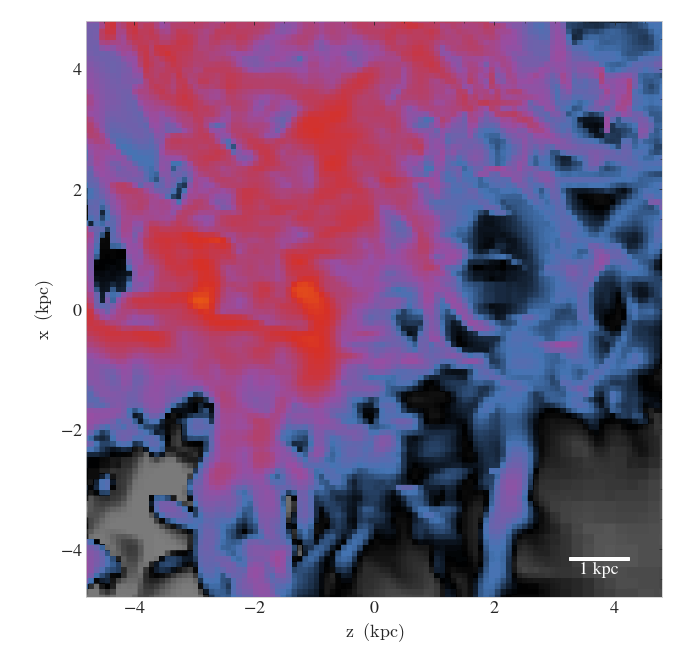

In [74]:
this_center = [center[0] - (7/proper_box_size), center[1], center[2] + (7/proper_box_size)]

p = yt.ProjectionPlot(ds, 'y', ('gas','H_p0_number_density'), center=this_center, data_source=refine_box, width=(0.1*refine_width,'kpc'))
p.set_cmap(('gas','H_p0_number_density'),h1_color_map)
p.set_zlim(('gas','H_p0_number_density'),h1_proj_min, h1_proj_max)
p.hide_colorbar()
#p.hide_axes()
p.annotate_scale(size_bar_args={'color':'white'})
p.show()

yt : [INFO     ] 2019-03-06 09:48:55,217 Projection completed
yt : [INFO     ] 2019-03-06 09:48:55,218 xlim = 0.501234 0.503154
yt : [INFO     ] 2019-03-06 09:48:55,218 ylim = 0.493075 0.494995
yt : [INFO     ] 2019-03-06 09:48:55,219 xlim = 0.501234 0.503154
yt : [INFO     ] 2019-03-06 09:48:55,220 ylim = 0.493075 0.494995
yt : [INFO     ] 2019-03-06 09:48:55,221 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800



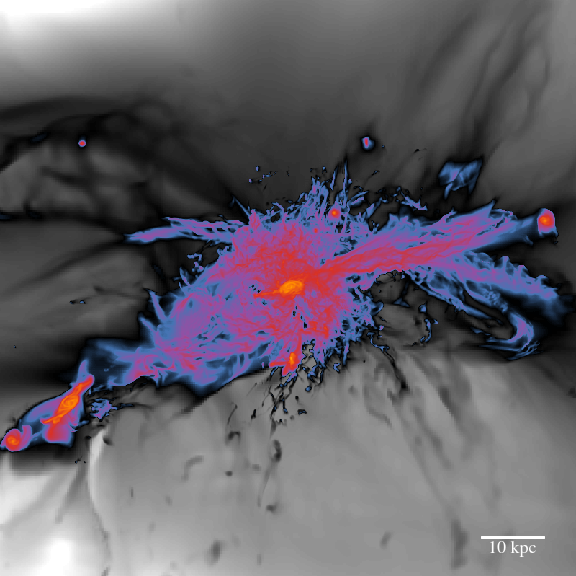

In [72]:
p = yt.ProjectionPlot(ds, 'y', ('gas','H_p0_number_density'), center=refine_box_center, data_source=refine_box, width=(0.96*refine_width,'kpc'))
p.set_cmap(('gas','H_p0_number_density'),h1_color_map)
p.set_zlim(('gas','H_p0_number_density'),h1_proj_min, h1_proj_max)
#p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'white'})
p.show()

yt : [INFO     ] 2019-03-06 09:55:18,793 Projection completed
yt : [INFO     ] 2019-03-06 09:55:18,794 xlim = 0.491769 0.512619
yt : [INFO     ] 2019-03-06 09:55:18,794 ylim = 0.483610 0.504460
yt : [INFO     ] 2019-03-06 09:55:18,796 xlim = 0.491769 0.512619
yt : [INFO     ] 2019-03-06 09:55:18,796 ylim = 0.483610 0.504460
yt : [INFO     ] 2019-03-06 09:55:18,798 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800



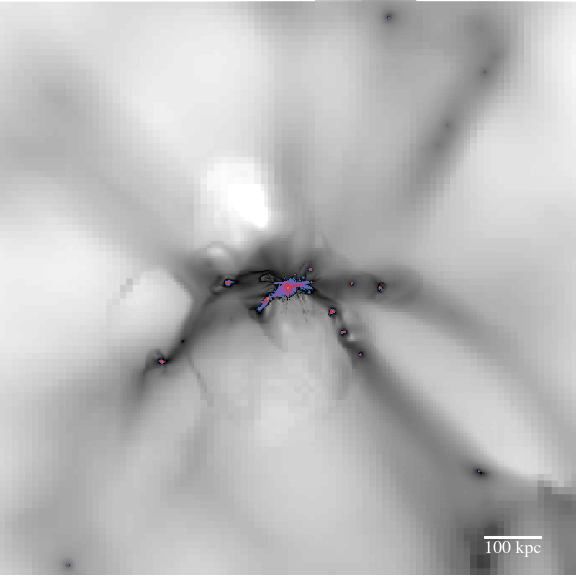

In [75]:
width = 1000. ## 1Mpc
width_code = width / proper_box_size ## needs to be in code units
box = ds.r[center[0] - 0.5*width_code : center[0] + 0.5*width_code, \
           center[1] - 0.5*2*refine_width_code : center[1] + 0.5*2*refine_width_code, \
           center[2] - 0.5*width_code : center[2] + 0.5*width_code]

p = yt.ProjectionPlot(ds, 'y', ('gas','H_p0_number_density'), center=refine_box_center, data_source=box, width=(width,'kpc'))
p.set_cmap(('gas','H_p0_number_density'),h1_color_map)
p.set_zlim(('gas','H_p0_number_density'),h1_proj_min, h1_proj_max)
#p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'white'})
p.show()

yt : [INFO     ] 2019-03-06 09:48:47,055 Projection completed
yt : [INFO     ] 2019-03-06 09:48:47,056 xlim = 0.033069 0.971319
yt : [INFO     ] 2019-03-06 09:48:47,057 ylim = 0.024910 0.963160
yt : [INFO     ] 2019-03-06 09:48:47,058 xlim = 0.033069 0.971319
yt : [INFO     ] 2019-03-06 09:48:47,058 ylim = 0.024910 0.963160
yt : [INFO     ] 2019-03-06 09:48:47,060 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800



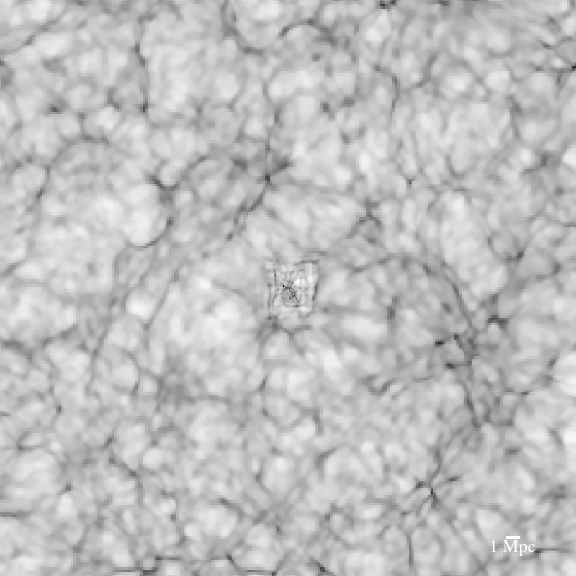

In [71]:
width = 45. * 1000. ## 100Mpc
width_code = width / proper_box_size ## needs to be in code units
box = ds.r[center[0] - 0.5*width_code : center[0] + 0.5*width_code, \
           center[1] - 0.5*5*refine_width_code : center[1] + 0.5*5*refine_width_code, \
           center[2] - 0.5*width_code : center[2] + 0.5*width_code]

p = yt.ProjectionPlot(ds, 'y', ('gas','H_p0_number_density'), center=refine_box_center, data_source=box, width=(width,'kpc'))
p.set_cmap(('gas','H_p0_number_density'),h1_color_map)
p.set_zlim(('gas','H_p0_number_density'),h1_proj_min, h1_proj_max)
#p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'white'})
p.show()

yt : [INFO     ] 2019-04-23 16:30:40,805 Projection completed
yt : [INFO     ] 2019-04-23 16:30:40,806 xlim = 0.485360 0.487360
yt : [INFO     ] 2019-04-23 16:30:40,807 ylim = 0.502194 0.504194
yt : [INFO     ] 2019-04-23 16:30:40,808 xlim = 0.485360 0.487360
yt : [INFO     ] 2019-04-23 16:30:40,808 ylim = 0.502194 0.504194
yt : [INFO     ] 2019-04-23 16:30:40,810 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800



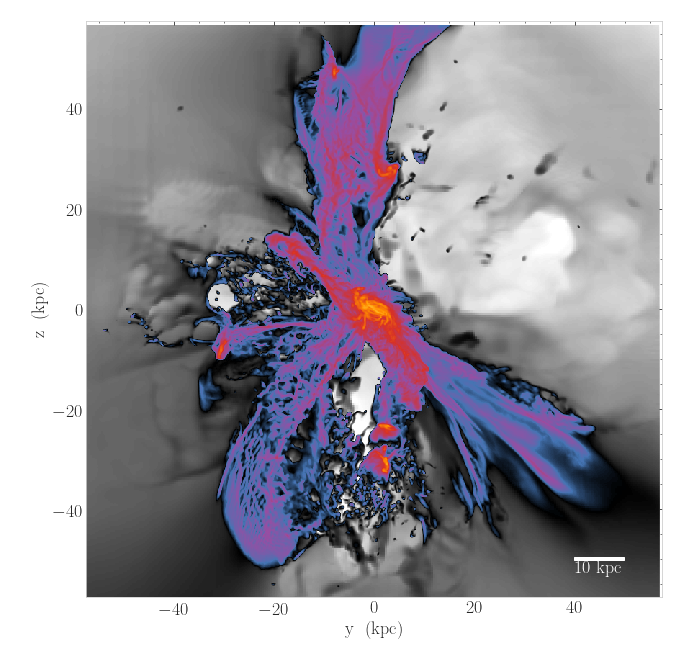

In [30]:
p = yt.ProjectionPlot(ds, 'x', ('gas','H_p0_number_density'), center=center, data_source=refine_box, width=(refine_width,'kpc'))
p.set_cmap(('gas','H_p0_number_density'),h1_color_map)
p.set_zlim(('gas','H_p0_number_density'),h1_proj_min, h1_proj_max)
p.hide_colorbar()
#p.hide_axes()
p.annotate_scale(size_bar_args={'color':'white'})
p.show()


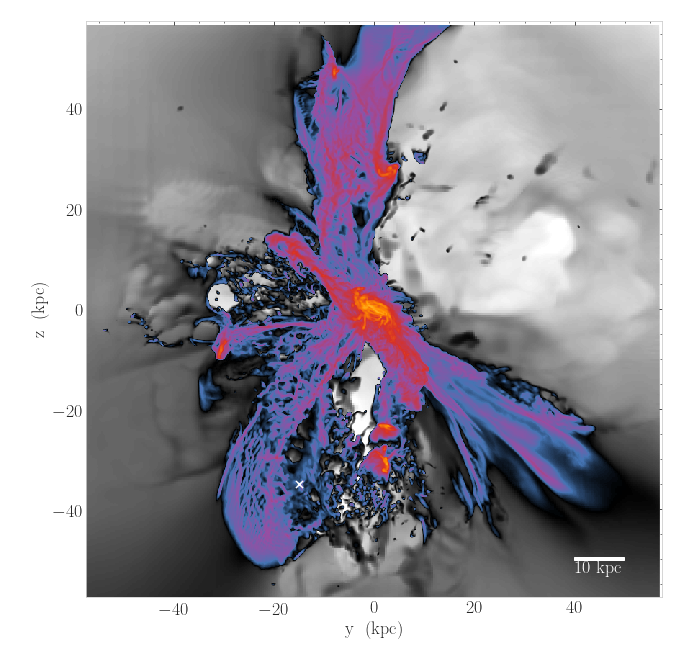

In [31]:
this_center = [center[0], center[1] - (15/proper_box_size), center[2] - (35/proper_box_size)]
p.annotate_marker(this_center)

yt : [INFO     ] 2019-04-23 16:28:21,689 Projection completed
yt : [INFO     ] 2019-04-23 16:28:21,690 xlim = 0.485999 0.486199
yt : [INFO     ] 2019-04-23 16:28:21,691 ylim = 0.502486 0.502686
yt : [INFO     ] 2019-04-23 16:28:21,692 xlim = 0.485999 0.486199
yt : [INFO     ] 2019-04-23 16:28:21,693 ylim = 0.502486 0.502686
yt : [INFO     ] 2019-04-23 16:28:21,695 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800



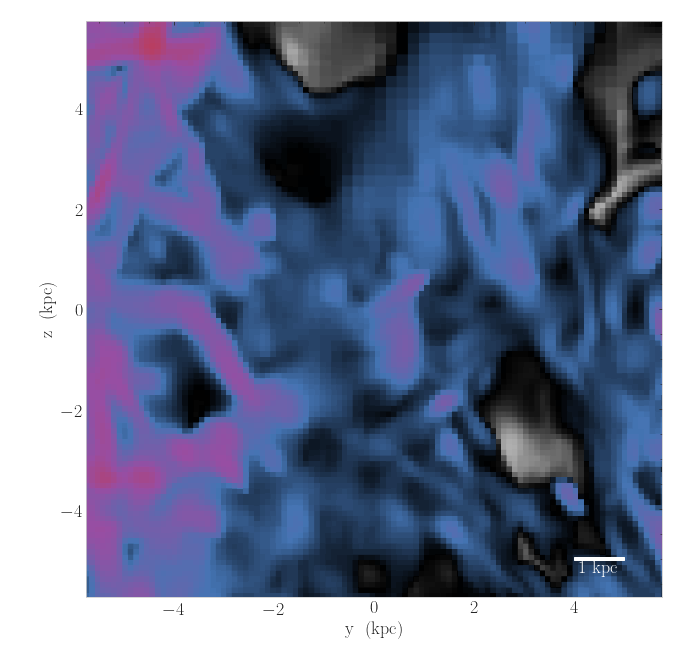

In [27]:
### find region for cloudlets
##this_center = [center[0], center[1] - (15/proper_box_size), center[2] - (25/proper_box_size)]

p = yt.ProjectionPlot(ds, 'x', ('gas','H_p0_number_density'), center=this_center, data_source=refine_box, width=(0.1*refine_width,'kpc'))
p.set_cmap(('gas','H_p0_number_density'),h1_color_map)
p.set_zlim(('gas','H_p0_number_density'),h1_proj_min, h1_proj_max)
p.hide_colorbar()
#p.hide_axes()
p.annotate_scale(size_bar_args={'color':'white'})
p.show()

yt : [INFO     ] 2019-04-23 16:28:14,897 Projection completed
yt : [INFO     ] 2019-04-23 16:28:14,898 xlim = 0.502486 0.502686
yt : [INFO     ] 2019-04-23 16:28:14,898 ylim = 0.493254 0.493454
yt : [INFO     ] 2019-04-23 16:28:14,900 xlim = 0.502486 0.502686
yt : [INFO     ] 2019-04-23 16:28:14,900 ylim = 0.493254 0.493454
yt : [INFO     ] 2019-04-23 16:28:14,902 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800



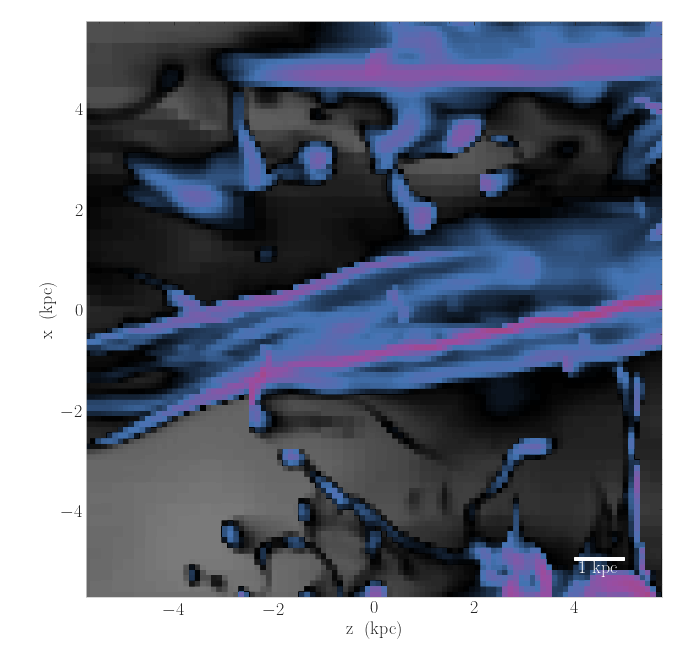

In [26]:
### find region for cloudlets
##this_center = [center[0], center[1] - (10/proper_box_size), center[2] - (25/proper_box_size)]

p = yt.ProjectionPlot(ds, 'y', ('gas','H_p0_number_density'), center=this_center, data_source=refine_box, width=(0.1*refine_width,'kpc'))
p.set_cmap(('gas','H_p0_number_density'),h1_color_map)
p.set_zlim(('gas','H_p0_number_density'),h1_proj_min, h1_proj_max)
p.hide_colorbar()
#p.hide_axes()
p.annotate_scale(size_bar_args={'color':'white'})
p.show()

yt : [INFO     ] 2019-04-23 16:28:08,441 Projection completed
yt : [INFO     ] 2019-04-23 16:28:08,442 xlim = 0.493254 0.493454
yt : [INFO     ] 2019-04-23 16:28:08,442 ylim = 0.485999 0.486199
yt : [INFO     ] 2019-04-23 16:28:08,444 xlim = 0.493254 0.493454
yt : [INFO     ] 2019-04-23 16:28:08,445 ylim = 0.485999 0.486199
yt : [INFO     ] 2019-04-23 16:28:08,446 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800



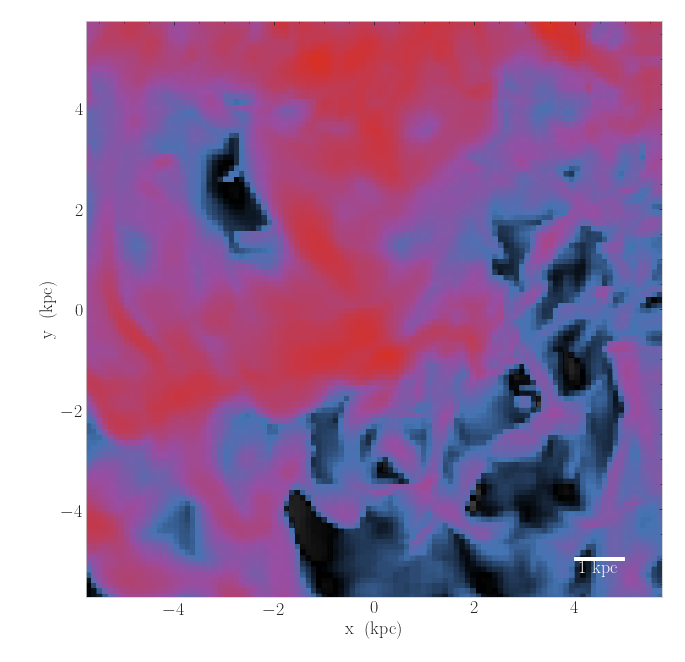

In [25]:
### find region for cloudlets
##this_center = [center[0], center[1] - (10/proper_box_size), center[2] - (25/proper_box_size)]

p = yt.ProjectionPlot(ds, 'z', ('gas','H_p0_number_density'), center=this_center, data_source=refine_box, width=(0.1*refine_width,'kpc'))
p.set_cmap(('gas','H_p0_number_density'),h1_color_map)
p.set_zlim(('gas','H_p0_number_density'),h1_proj_min, h1_proj_max)
p.hide_colorbar()
#p.hide_axes()
p.annotate_scale(size_bar_args={'color':'white'})
p.show()

In [32]:
this_center

[0.49335384368896484, 0.48609897126005747, 0.5025857303034154]